# EBL Attenuation of a Spectral Model

In this notebook we create a simple *astromodels* spectrum and then apply EBL attenuation, as a function of redshift and energy.

The `EBLattenuation` class in astromodels relies directly on the *ebltable* package by Manuel Meyer, see [ebltable](https://github.com/me-manu/ebltable) .
Currently, the 3ML implementation selects the `Dominguez` model for optical depth by default.

In [1]:
from threeML import *

Configuration read from /home/rlauer/.threeML/threeML_config.yml


In [2]:
# define power law spectrum
sourceName = 'Mrk421'
spectrum = Powerlaw()
#put it into a PS model, in this context primarily in order to establish units
source1 = PointSource(sourceName, ra=166.11, dec=38.21, spectral_shape=spectrum)
#and set parameters:
spectrum.piv = 1. * u.TeV
spectrum.K = 1.e-11 / (u.TeV * u.cm**2 * u.s)
spectrum.index = -2.2

In [3]:
#define attenuated spectrum:
ebl = EBLattenuation()
spectrumEBL = spectrum * ebl
source2 = PointSource(sourceName, ra=166.11, dec=38.21, spectral_shape=spectrumEBL)
#show new parameter names:
spectrumEBL.display()

* description: (Powerlaw{1} * EBLattenuation{2})
  * formula: (no latex formula available)
  * parameters: 
    * K_1: 
      * value: 1e-20
      * desc: Normalization (differential flux at the pivot value)
      * min_value: 1e-30
      * max_value: 1000.0
      * unit: cm-2 keV-1 s-1
      * is_normalization: True
      * delta: 0.1
      * free: True
    * piv_1: 
      * value: 1000000000.0
      * desc: Pivot value
      * min_value: None
      * max_value: None
      * unit: keV
      * is_normalization: False
      * delta: 0.1
      * free: False
    * index_1: 
      * value: -2.2
      * desc: Photon index
      * min_value: -10.0
      * max_value: 10.0
      * unit: 
      * is_normalization: False
      * delta: 0.2
      * free: True
    * redshift_2: 
      * value: 1.0
      * desc: redshift of the source
      * min_value: None
      * max_value: None
      * unit: 
      * is_normalization: False
      * delta: 0.1
      * free: False

In [4]:
#set redshift:
spectrumEBL.redshift_2 = 0.031*u.dimensionless_unscaled

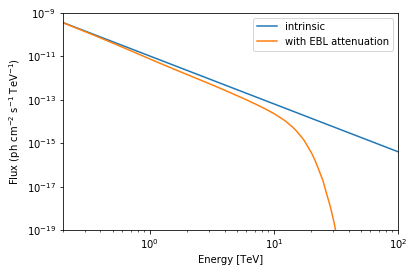

In [5]:
#use matplotlib to plot both spectra:
import matplotlib.pyplot as plt
import numpy as np
energies = np.logspace(-1.,2.,100)*u.TeV
#factor 1e9 to convert to TeV^-1
plt.loglog(energies,spectrum(energies)*1e9,label="intrinsic")
plt.loglog(energies,spectrumEBL(energies)*1e9,label="with EBL attenuation")
plt.legend(loc=1)

plt.xlim(0.2,100.)
plt.ylim(1e-19,1e-9)
plt.xlabel("Energy [TeV]")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ TeV$^{-1}$)")

plt.show()